In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/magisterka

/content/drive/My Drive/magisterka


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from enum import Enum, auto
import json

import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from scripts.data_processing.market_data_processing import prepare_market_data_for_model, add_sentiment_features_from_articles
from model_training.price_model_training import train_price_prediction_model, ModelType, LossFunction
from model_training.price_model_validation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
np.random.seed(120)
random.seed(120)

In [5]:
base_path = '/content/drive/My Drive/magisterka/data/market_data'

In [6]:
X, y = prepare_market_data_for_model("eth_merged.csv", base_path, horizon=12*12)

In [7]:
texts = pd.read_csv("/content/drive/My Drive/magisterka/data/results/articles_labeled.csv")

In [8]:
X = add_sentiment_features_from_articles(X, texts, windows_hours=(2, 6, 12, 24))

In [9]:
X

,price_over_ema4h,price_over_ema2h,volatility_4h,volatility_wh,volume_z,s_t,log_return_t-1,news_any,sentiment_mean_2h,news_count_2h,has_news_2h,sentiment_mean_6h,news_count_6h,has_news_6h,sentiment_mean_12h,news_count_12h,has_news_12h,sentiment_mean_24h,news_count_24h,has_news_24h
timestamp,,,,,,,,,,,,,,,,,,,,
2025-04-12 00:10:00+00:00,-0.002423,-0.001673,0.001412,0.002160,-0.520829,0.002160,0.001334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2025-04-12 00:15:00+00:00,-0.001047,-0.000314,0.001422,0.002152,-0.258105,0.002152,-0.001578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2025-04-12 00:20:00+00:00,-0.002516,-0.001739,0.001440,0.002154,-0.556829,0.002154,-0.000416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2025-04-12 00:25:00+00:00,-0.002812,-0.001983,0.001397,0.002153,-0.466902,0.002153,0.000338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2025-04-12 00:30:00+00:00,-0.002373,-0.001513,0.001378,0.002153,-0.669833,0.002153,0.000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06 11:35:00+00:00,0.002228,-0.000398,0.001209,0.002422,0.300042,0.002422,-0.000962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003472,4.0,1.0
2025-06-06 11:40:00+00:00,0.001213,-0.001250,0.001193,0.002422,-0.517769,0.002422,0.000448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003472,4.0,1.0
2025-06-06 11:45:00+00:00,0.001593,-0.000739,0.001193,0.002423,-0.593206,0.002423,-0.000368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003472,4.0,1.0


In [10]:
split = TimeSeriesSplit(n_splits=5)

# LSTM - trenowanie

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.8347 - val_loss: 0.9508 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6510 - val_loss: 0.9395 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6355 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6308 - val_loss: 0.9508 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6120 - val_loss: 0.9485 - learning_rate: 5.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6086 - val_loss: 0.9562 - learning_rate: 5.0000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5881 - val_loss: 0.9596 - learning_rate: 2.5000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.5841 - val_loss: 0.9607 - learning_rate: 2.5000e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5691 - val_loss: 0.9665 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


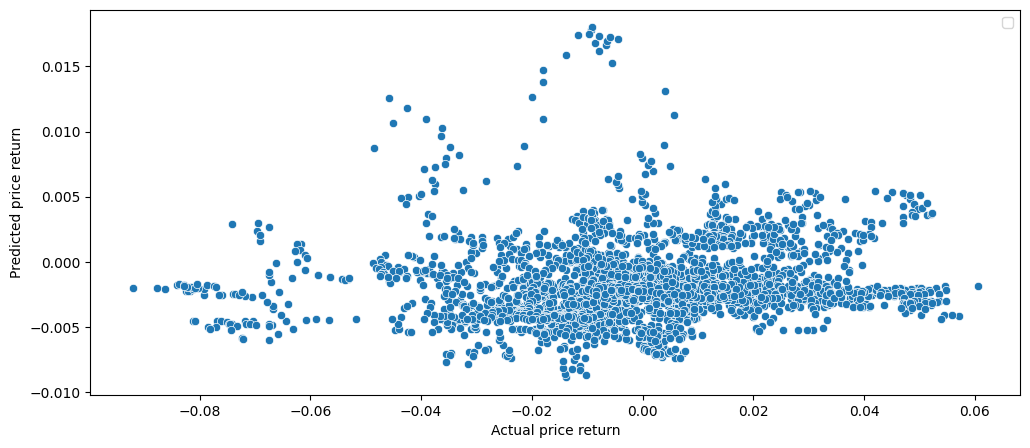

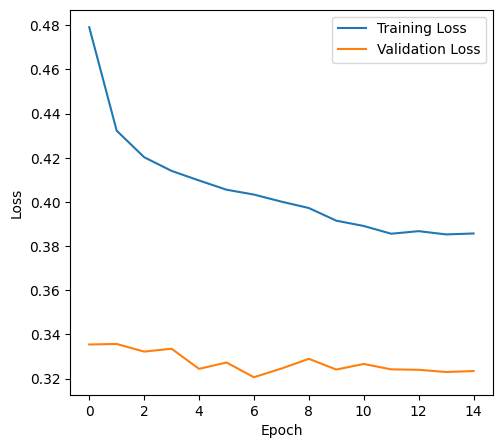

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009192375582642853
mean CV MAE: 0.021813437342643738
mean CV DA: 0.5409090909090909
mean CV SR: 0.12053453057008574
mean CV R^2: -0.17230021953582764
mean CV Pearson correlation: 0.0031375556718558073


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


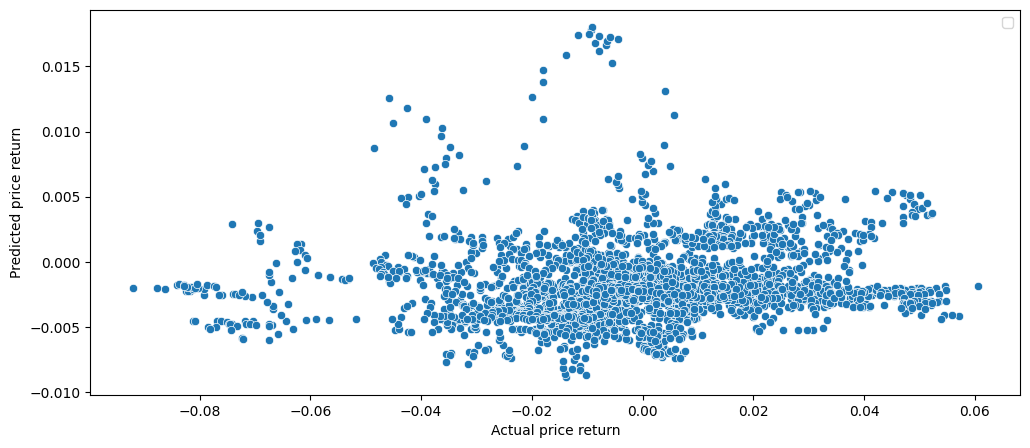

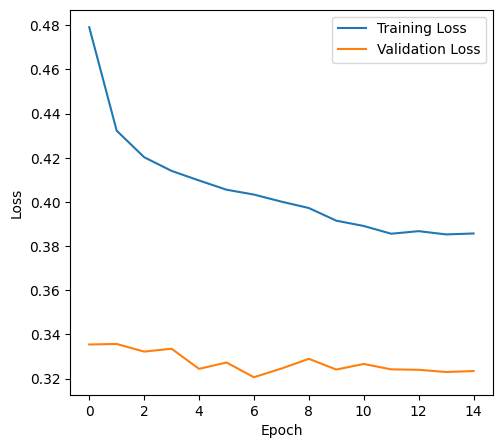

successfully saved training's output to lstm_eth_scores_final_1_1.json


In [11]:
lstm_1_scores, lstm_1_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_1_1.json", dropout=0.5, num_neurons=32, batch_size=128, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.7709 - val_loss: 0.8605 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6779 - val_loss: 0.8538 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5986 - val_loss: 0.8846 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5989 - val_loss: 0.9013 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5383 - val_loss: 0.9038 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5178 - val_loss: 0.9278 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5231 - val_loss: 0.9254 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.5120 - val_loss: 0.9265 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4960 - val_loss: 0.9292 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


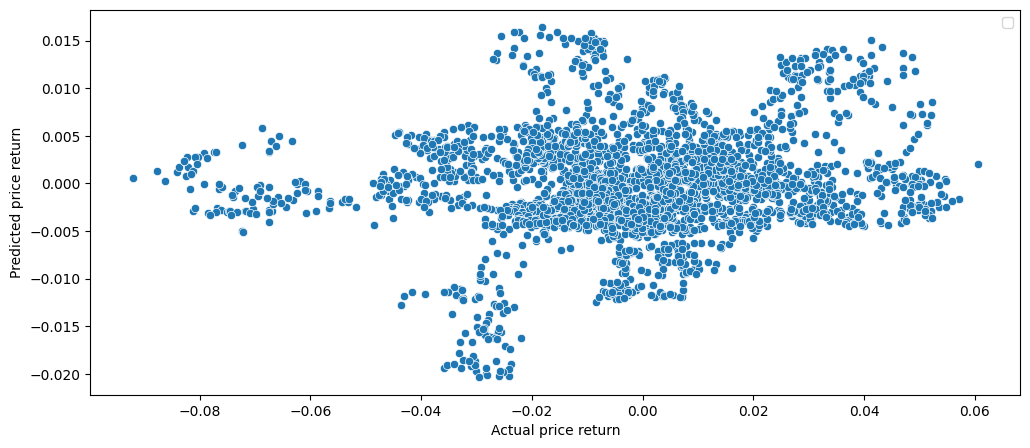

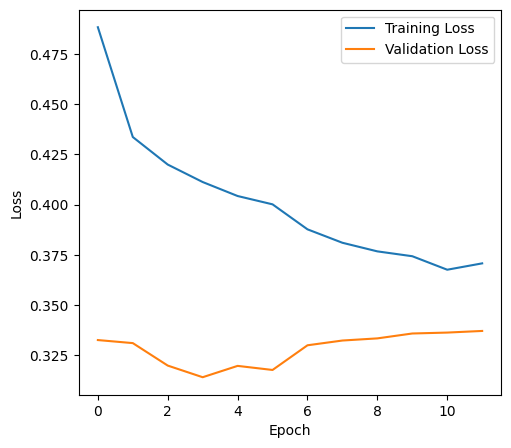

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009591981652192771
mean CV MAE: 0.022185828536748886
mean CV DA: 0.5276595744680851
mean CV SR: 0.027782934126532172
mean CV R^2: -0.22731375694274902
mean CV Pearson correlation: -0.02471764385700226


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


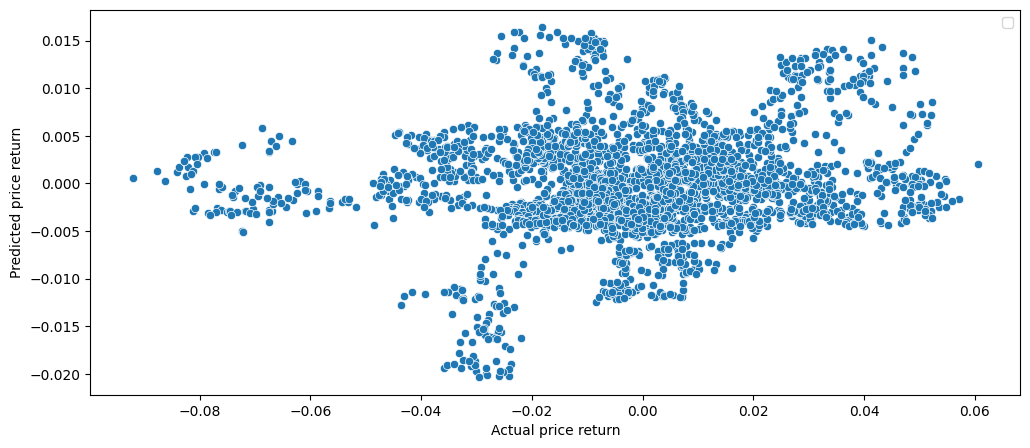

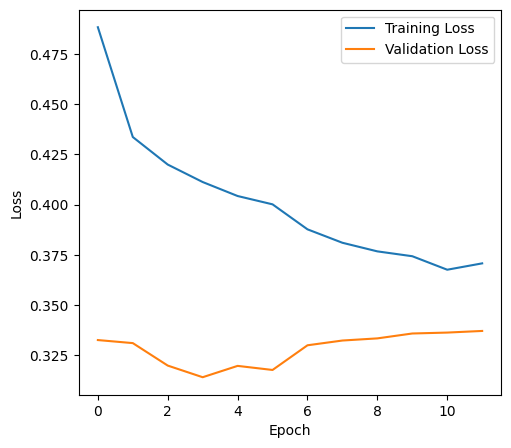

successfully saved training's output to lstm_eth_scores_final_2_1.json


In [12]:
lstm_2_scores, lstm_2_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_2_1.json", dropout=0.5, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.9288 - val_loss: 0.9886 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7925 - val_loss: 0.8788 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7020 - val_loss: 0.9296 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6691 - val_loss: 0.9512 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6157 - val_loss: 0.9262 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6067 - val_loss: 0.9396 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5921 - val_loss: 0.9524 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5782 - val_loss: 0.9445 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5788 - val_loss: 0.9562 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


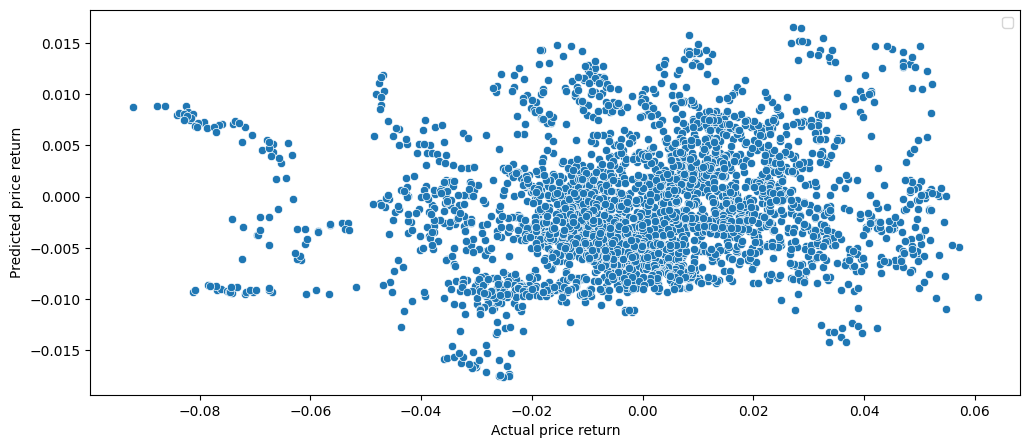

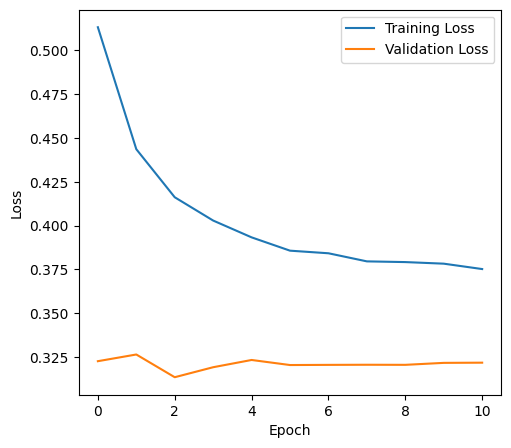

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009446847252547741
mean CV MAE: 0.022105535492300987
mean CV DA: 0.5006769825918762
mean CV SR: -0.010130749390162837
mean CV R^2: -0.20882089138031007
mean CV Pearson correlation: -0.10337114334106445


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


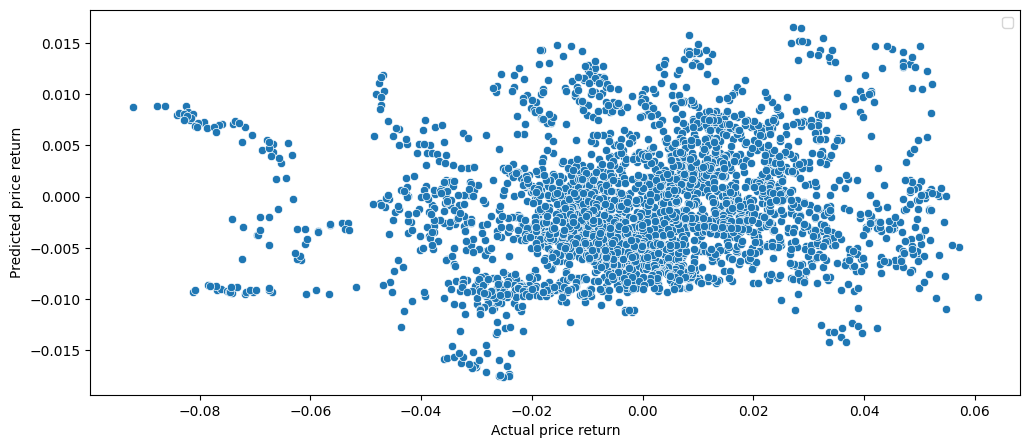

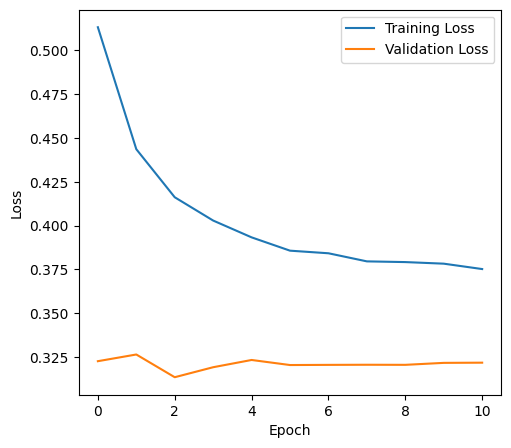

successfully saved training's output to lstm_eth_scores_final_3_1.json


In [13]:
lstm_3_scores, lstm_3_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_3_1.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.8155 - val_loss: 0.8915 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.7512 - val_loss: 0.8490 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7197 - val_loss: 0.8797 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7072 - val_loss: 0.8902 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6803 - val_loss: 0.9183 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6636 - val_loss: 0.9057 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6706 - val_loss: 0.9056 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6847 - val_loss: 0.9098 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6684 - val_loss: 0.9137 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


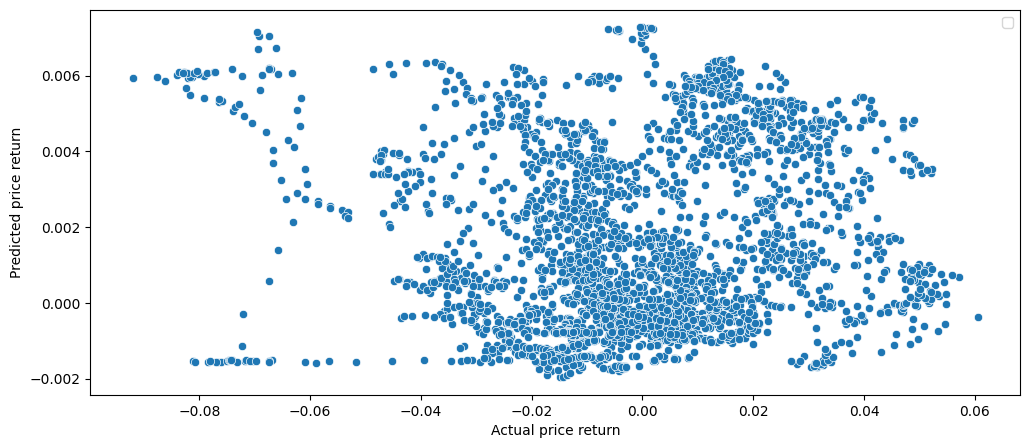

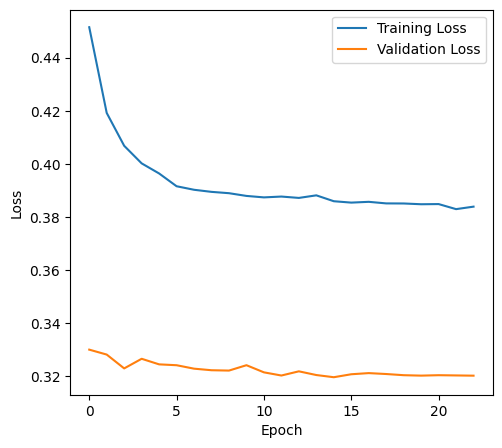

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009001233847811818
mean CV MAE: 0.021454697474837303
mean CV DA: 0.4999032882011606
mean CV SR: 0.01942274908309157
mean CV R^2: -0.12441147565841675
mean CV Pearson correlation: -0.06260142475366592


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


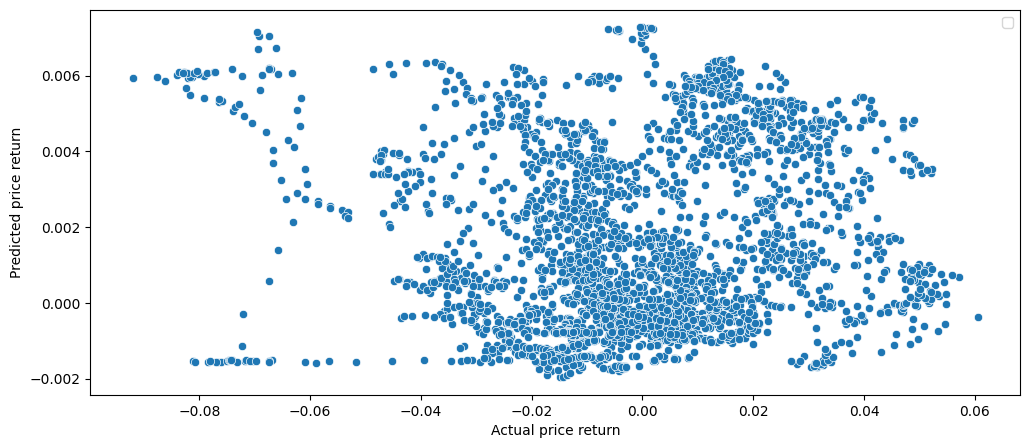

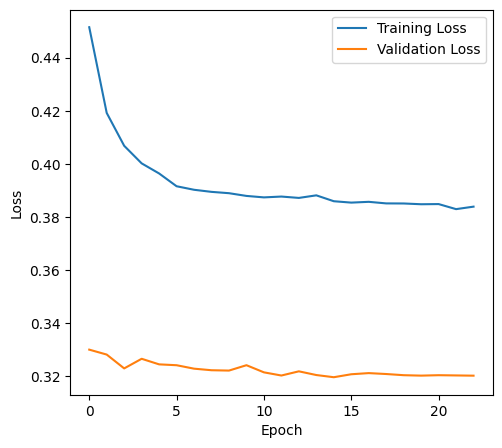

successfully saved training's output to lstm_eth_scores_final_4_1.json


In [14]:
lstm_4_scores, lstm_4_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_4_1.json", dropout=0.7, num_neurons=24, num_layers=2, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.8850 - val_loss: 0.8909 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7442 - val_loss: 0.8593 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6427 - val_loss: 0.8982 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6611 - val_loss: 0.8940 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6113 - val_loss: 0.8939 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5972 - val_loss: 0.9065 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5971 - val_loss: 0.9123 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5876 - val_loss: 0.9028 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5783 - val_loss: 0.9091 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


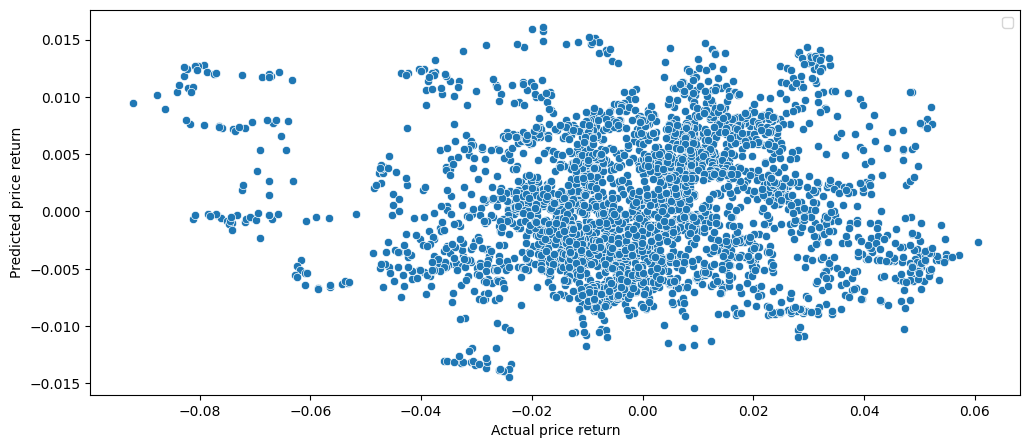

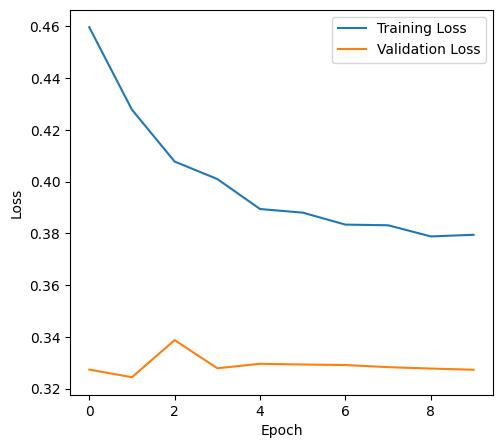

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009455440449528396
mean CV MAE: 0.0217178575694561
mean CV DA: 0.5307543520309477
mean CV SR: -0.005132646742228919
mean CV R^2: -0.17912940979003905
mean CV Pearson correlation: -0.07040964812040329


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


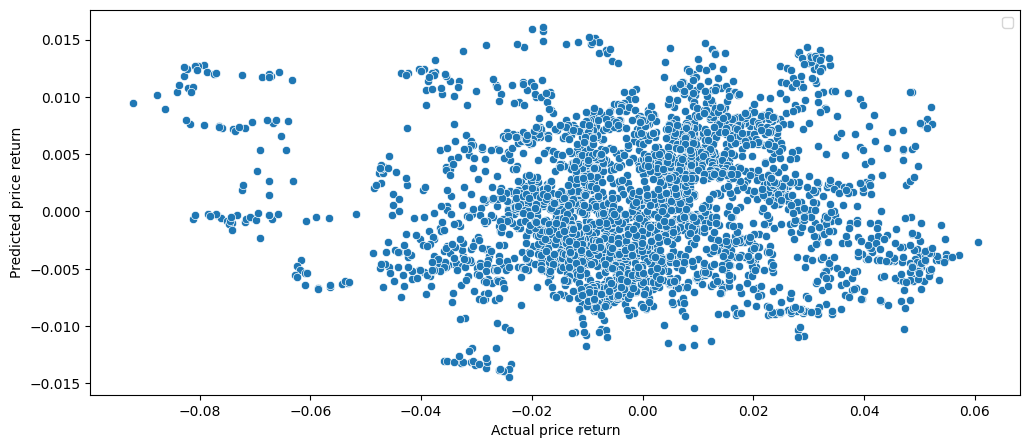

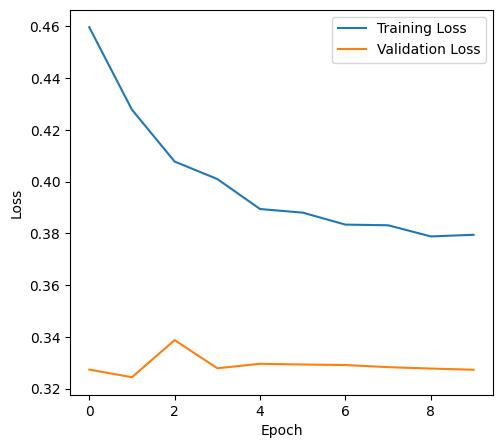

successfully saved training's output to lstm_eth_scores_final_5_1.json


In [15]:
lstm_5_scores, lstm_5_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_5_1.json", dropout=0.7, num_neurons=24, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# GRU - trenowanie

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.7876 - val_loss: 0.8283 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7194 - val_loss: 0.8577 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6928 - val_loss: 0.8838 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6833 - val_loss: 0.8903 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6906 - val_loss: 0.8974 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6751 - val_loss: 0.8877 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6769 - val_loss: 0.8895 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.6756 - val_loss: 0.8927 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.6514 - val_loss: 0.9000 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


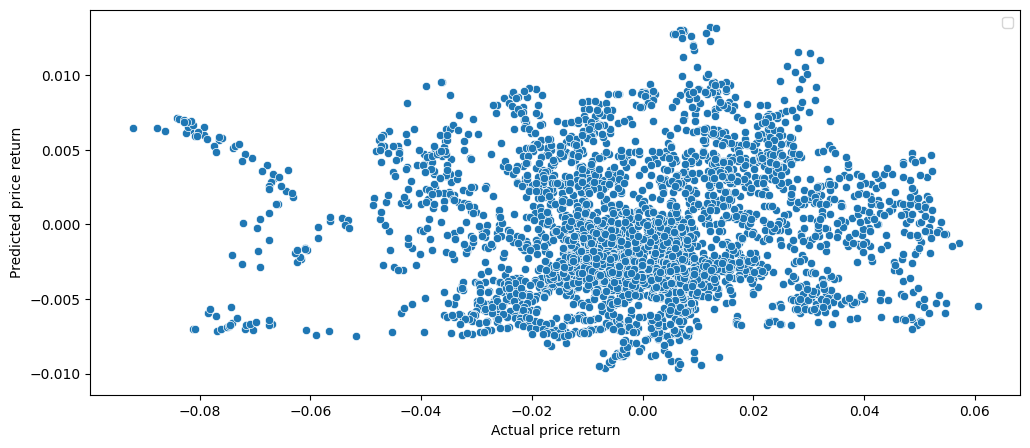

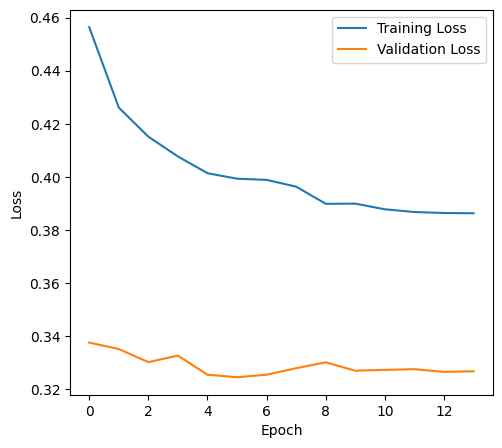

=== Cross-validation (validation folds) ===
mean CV MSE: 0.000925047614146024
mean CV MAE: 0.02155306003987789
mean CV DA: 0.5005802707930368
mean CV SR: -0.01259923951065195
mean CV R^2: -0.1478531241416931
mean CV Pearson correlation: -0.05897869914770126


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


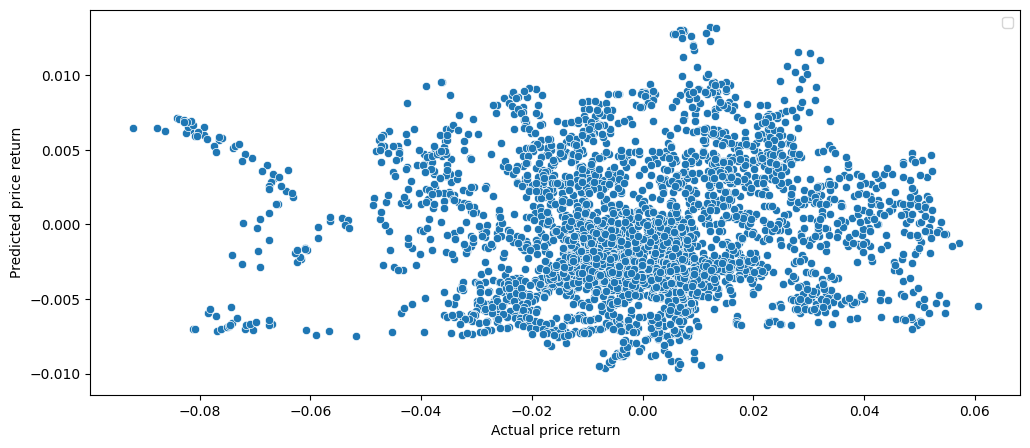

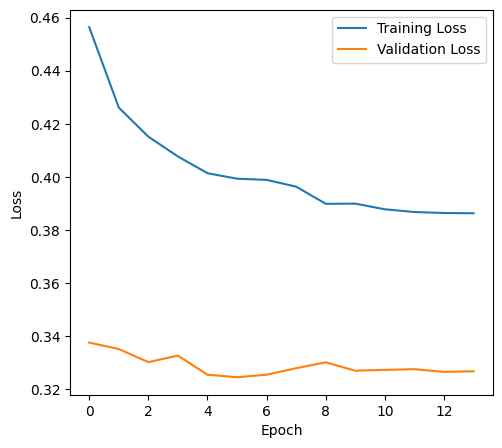

successfully saved training's output to gru_eth_scores_1_1_final.json


In [16]:
gru_1_scores, gru_1_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_1_1_final.json", dropout=0.7, num_neurons=32, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.7843 - val_loss: 0.8201 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7309 - val_loss: 0.8308 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6868 - val_loss: 0.8548 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6569 - val_loss: 0.8646 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6290 - val_loss: 0.8625 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6125 - val_loss: 0.8700 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6220 - val_loss: 0.8685 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6273 - val_loss: 0.8666 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6130 - val_loss: 0.8700 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


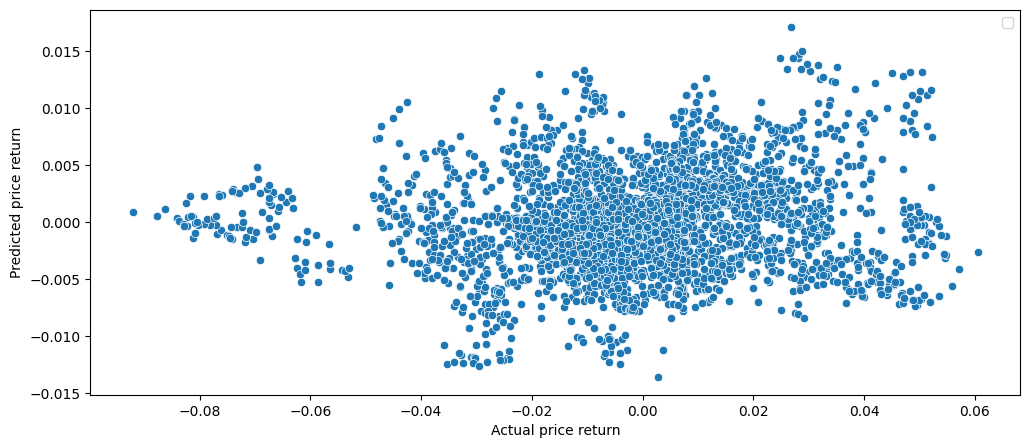

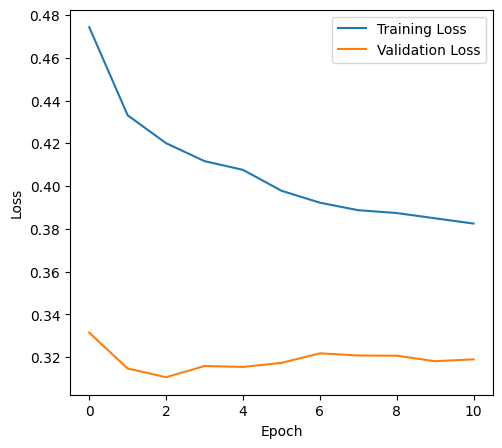

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009045863407664001
mean CV MAE: 0.021508023142814636
mean CV DA: 0.5284332688588008
mean CV SR: 0.0932880418739825
mean CV R^2: -0.14193463325500488
mean CV Pearson correlation: 0.021159492433071136


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


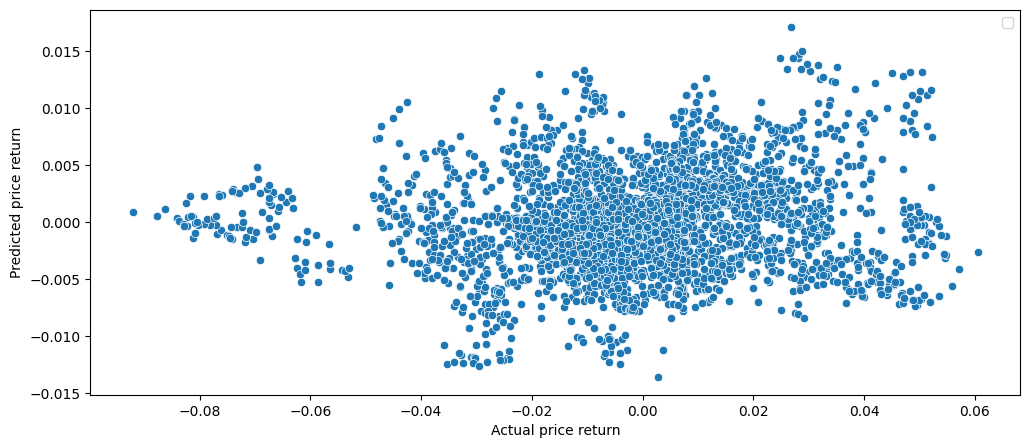

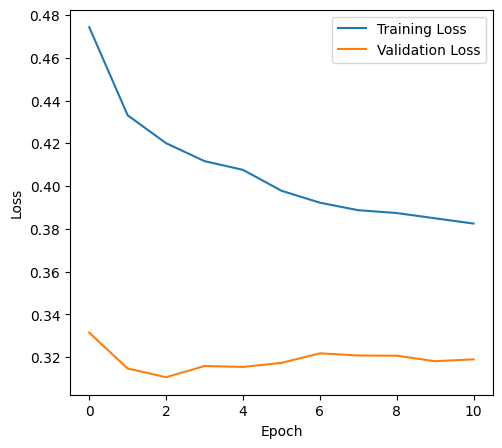

successfully saved training's output to gru_eth_scores_final_2_1.json


In [17]:
gru_2_scores, gru_2_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_final_2_1.json", dropout=0.7, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.0294 - val_loss: 1.0066 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.8433 - val_loss: 0.8445 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6923 - val_loss: 0.9300 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6514 - val_loss: 0.9028 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6434 - val_loss: 0.8895 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6242 - val_loss: 0.8852 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5988 - val_loss: 0.9051 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6090 - val_loss: 0.8942 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5872 - val_loss: 0.8955 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


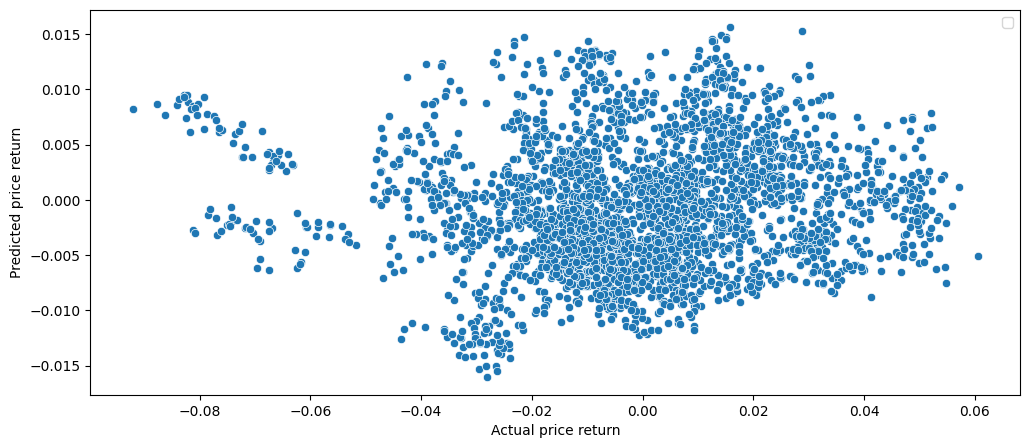

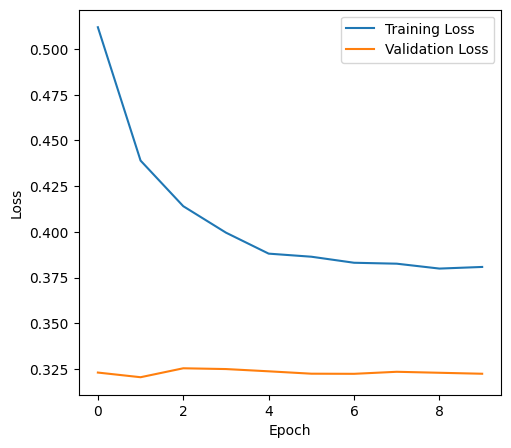

=== Cross-validation (validation folds) ===
mean CV MSE: 0.000928165391087532
mean CV MAE: 0.021781310439109802
mean CV DA: 0.5258220502901354
mean CV SR: 0.023420835292830993
mean CV R^2: -0.1860421895980835
mean CV Pearson correlation: -0.07385148853063583


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


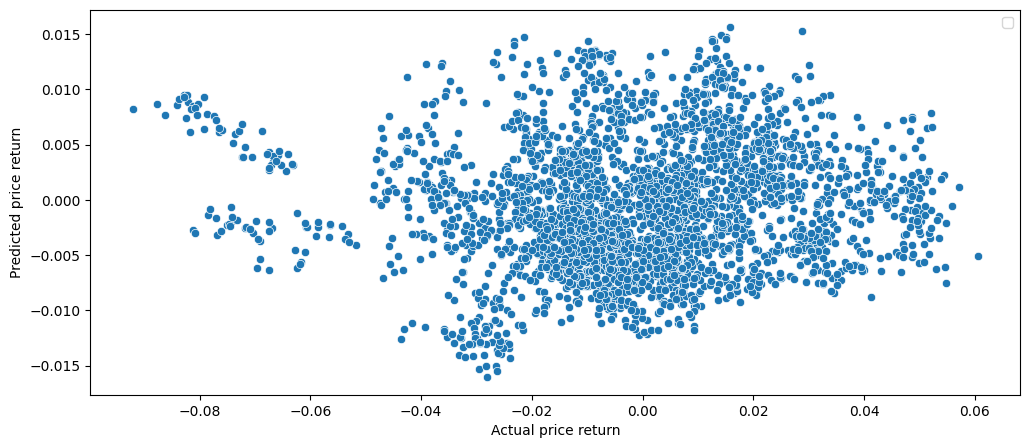

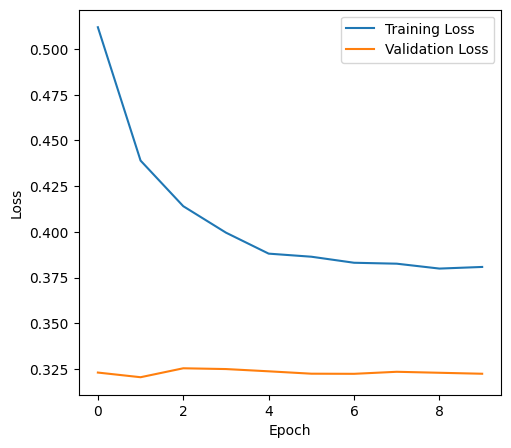

successfully saved training's output to gru_eth_scores_final_3_1.json


In [18]:
gru_3_scores, gru_3_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_final_3_1.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 1.1246 - val_loss: 1.1138 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9292 - val_loss: 1.1316 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7170 - val_loss: 0.9075 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6750 - val_loss: 0.9533 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6451 - val_loss: 0.9086 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5897 - val_loss: 0.9081 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5376 - val_loss: 0.9280 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5275 - val_loss: 0.9349 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4887 - val_loss: 0.9637 - learning_rate: 5.0000e-04
Ep

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


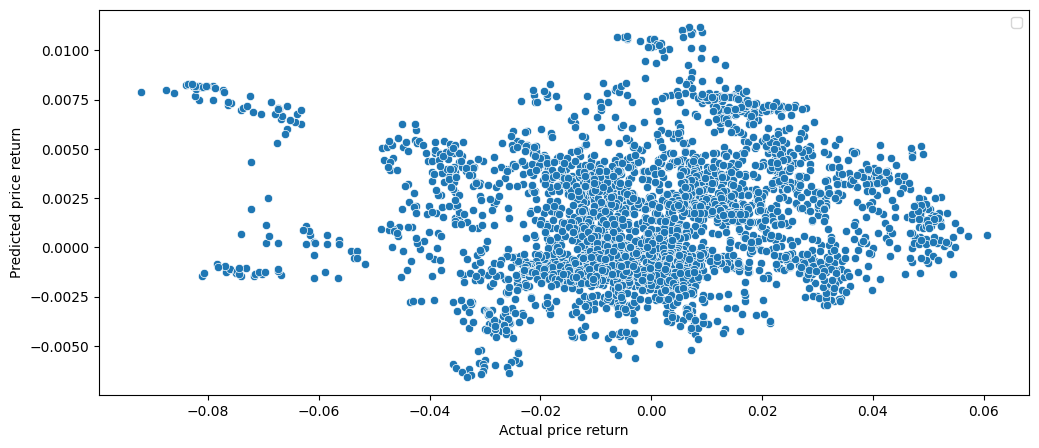

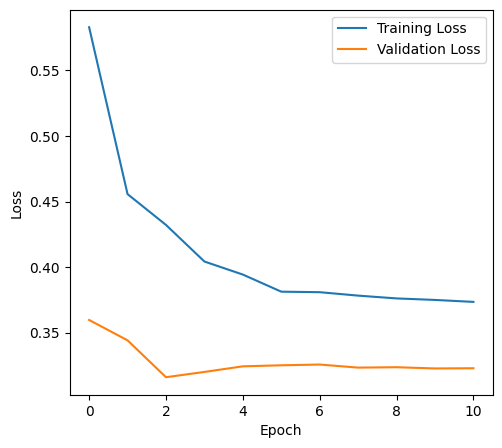

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009269124711863697
mean CV MAE: 0.021993212401866913
mean CV DA: 0.4979690522243714
mean CV SR: 0.04327891514522018
mean CV R^2: -0.1876375436782837
mean CV Pearson correlation: -0.05637738108634949


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


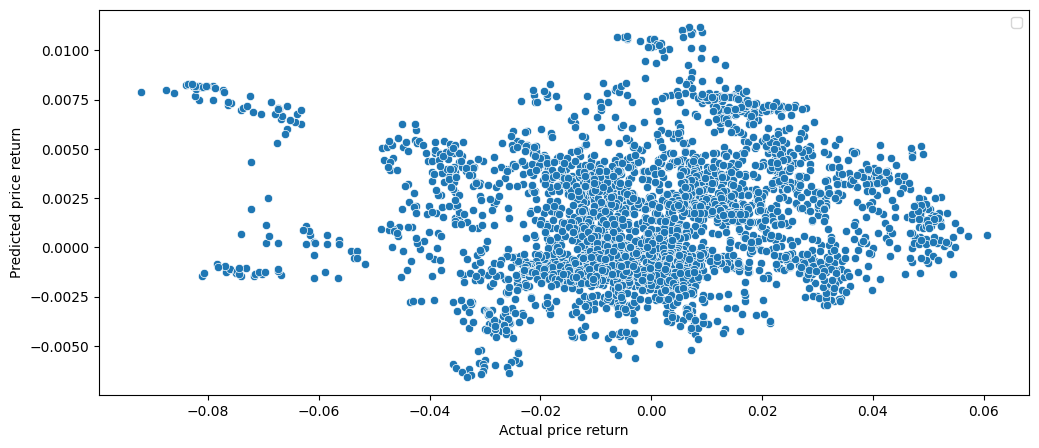

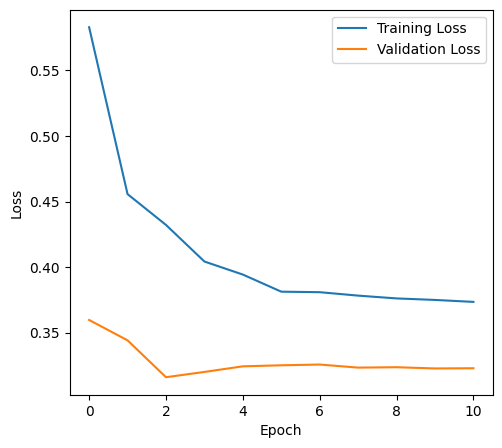

successfully saved training's output to gru_eth_scores_final_4_1.json


In [19]:
gru_4_scores, gru_4_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_final_4_1.json", dropout=0.5, num_neurons=64, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# ARIMA - trenowanie

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 1] mse: 0.000974817 | mae: 0.022446 | da: 0.565 | sr: -0.022


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 2] mse: 0.000172005 | mae: 0.0101383 | da: 0.567 | sr: 0.103


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 3] mse: 0.00358411 | mae: 0.0416512 | da: 0.457 | sr: -0.490


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 4] mse: 0.00107539 | mae: 0.0258179 | da: 0.458 | sr: -0.059


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 5] mse: 0.000853852 | mae: 0.0234462 | da: 0.445 | sr: -0.033


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[FINAL TEST] mse: 0.000616687 | mae: 0.0186787 | da: 0.528 | sr: 0.064 | r_squared: -0.120 | corr: 0.036


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


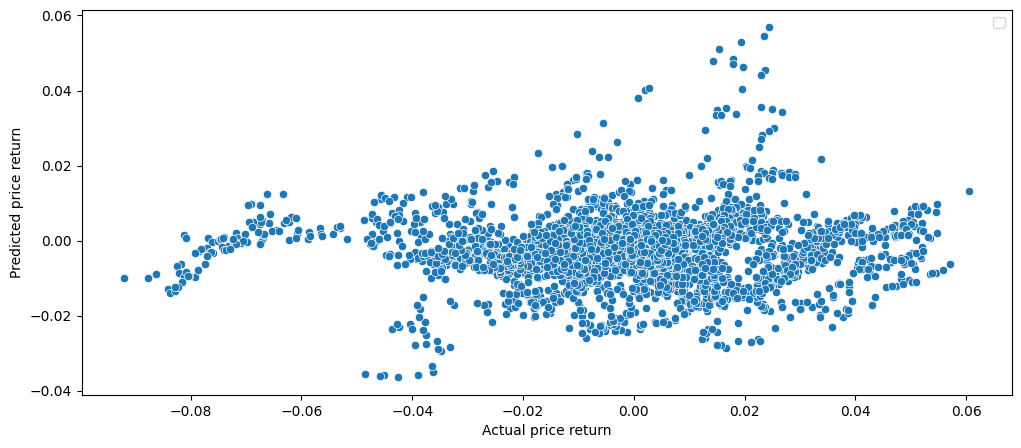

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00133203607461291
mean CV MAE: 0.024699928333357747
mean CV DA: 0.4985452839042702
mean CV SR: -0.09998154474200197
mean CV R^2: -0.49579967257008273
mean CV Pearson correlation: -0.06647891057210419


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


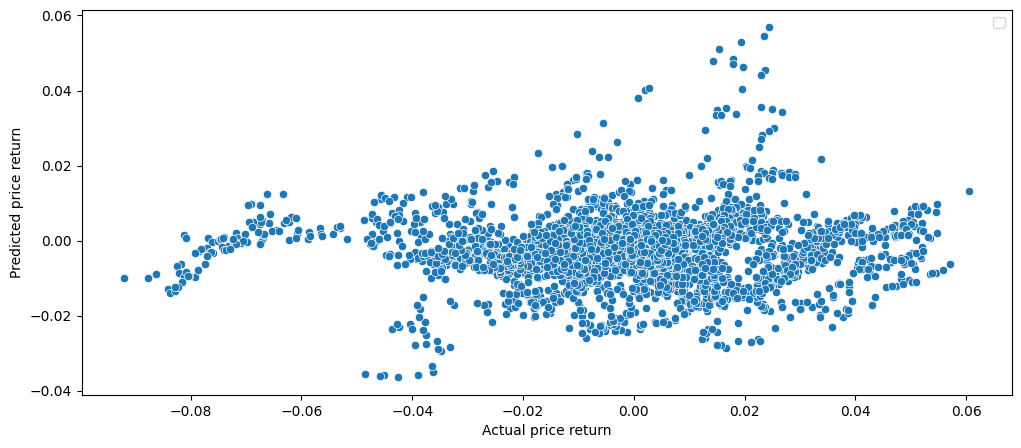

successfully saved training's output to arima_eth_scores_1_final.json


In [20]:
arima_scores, arima_history = train_price_prediction_model(X, y, ModelType.ARIMA, split, "arima_eth_scores_1_final.json", epochs=100)